<a href="https://colab.research.google.com/github/Houtate319/DS/blob/main/HOUTATE_Said_SS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




On commence par l'importation du package "ucimlrepo" pour nous faciliter la tâche d'importer une base de données depuis un référentiel UCI Machine Learning Repository à l'aide de la bibliothèque ucimlrepo.





In [6]:
pip install ucimlrepo

Ce code Python sert à télécharger et explorer automatiquement un jeu de données du référentiel UCI Machine Learning Repository à l'aide de la bibliothèque ucimlrepo.




In [14]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [17]:
import pandas as pd

file_path = "/content/drive/MyDrive/Préparation examen/Online retail/Online Retail.xlsx"
try:
    df = pd.read_excel(file_path)
    print("Base de données importée avec succès.")
    print(df.head())
except FileNotFoundError:
    print(f"Erreur: Le fichier n'a pas été trouvé à l'adresse {file_path}")
except Exception as e:
    print(f"Une erreur est survenue lors de l'importation du fichier: {e}")

Base de données importée avec succès.
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


# Task
Analyze the "Online Retail" dataset by first cleaning and preparing the data (handling missing values in 'Description' and 'CustomerID', and negative 'Quantity' and 'UnitPrice'). Then, create new features like 'TotalPrice' (Quantity * UnitPrice) and extract temporal information (year, month, day, hour) from 'InvoiceDate'. Subsequently, analyze sales trends by day and month to identify peak activity periods, identify top-selling products and most active/profitable customers, and examine the geographical distribution of sales. Visualize the results with appropriate legends, including sales trends, top products, top customers, and geographical sales distribution. Finally, provide a comprehensive summary of all findings from this in-depth analysis of the 'Online Retail' database.

## Nettoyage et Préparation des Données

### Subtask:
Traiter les valeurs manquantes dans les colonnes 'Description' et 'CustomerID', et gérer les valeurs négatives dans 'Quantity' et 'UnitPrice' qui pourraient indiquer des retours ou des erreurs.


**Reasoning**:
The first instruction is to identify and treat missing values in the 'Description' column by removing rows where 'Description' is missing. I will use `dropna()` on the DataFrame for this.



In [18]:
print(f"Taille initiale du DataFrame: {df.shape[0]} lignes")
df.dropna(subset=['Description'], inplace=True)
print(f"Taille du DataFrame après suppression des lignes avec 'Description' manquante: {df.shape[0]} lignes")

Taille initiale du DataFrame: 541909 lignes
Taille du DataFrame après suppression des lignes avec 'Description' manquante: 540455 lignes


**Reasoning**:
The next step is to remove rows with missing values in the 'CustomerID' column, as specified in the instructions. This is crucial for customer-centric analysis.



In [19]:
print(f"Taille du DataFrame avant suppression des lignes avec 'CustomerID' manquant: {df.shape[0]} lignes")
df.dropna(subset=['CustomerID'], inplace=True)
print(f"Taille du DataFrame après suppression des lignes avec 'CustomerID' manquant: {df.shape[0]} lignes")

Taille du DataFrame avant suppression des lignes avec 'CustomerID' manquant: 540455 lignes
Taille du DataFrame après suppression des lignes avec 'CustomerID' manquant: 406829 lignes


**Reasoning**:
Following the instructions, I need to identify and filter out rows where 'Quantity' is negative, as these typically represent returns and are not relevant for sales analysis. I will keep only transactions with a positive 'Quantity'.



In [20]:
print(f"Taille du DataFrame avant traitement des quantités négatives: {df.shape[0]} lignes")
df = df[df['Quantity'] > 0]
print(f"Taille du DataFrame après traitement des quantités négatives: {df.shape[0]} lignes")

Taille du DataFrame avant traitement des quantités négatives: 406829 lignes
Taille du DataFrame après traitement des quantités négatives: 397924 lignes


**Reasoning**:
As per the instructions, I need to filter out rows where 'UnitPrice' is zero or negative, as these are not valid for sales calculations. I will retain only those transactions with a strictly positive 'UnitPrice'.



In [21]:
print(f"Taille du DataFrame avant traitement des prix unitaires non positifs: {df.shape[0]} lignes")
df = df[df['UnitPrice'] > 0]
print(f"Taille du DataFrame après traitement des prix unitaires non positifs: {df.shape[0]} lignes")

Taille du DataFrame avant traitement des prix unitaires non positifs: 397924 lignes
Taille du DataFrame après traitement des prix unitaires non positifs: 397884 lignes


## Création de Nouvelles Caractéristiques

### Subtask:
Calculer le 'TotalPrice' (Quantité * Prix Unitaire) et extraire des informations temporelles comme l'année, le mois, le jour et l'heure à partir de la colonne 'InvoiceDate'.


**Reasoning**:
The first instruction is to convert the 'InvoiceDate' column to a datetime format, which is essential for extracting temporal features accurately.



In [22]:
print(f"Type initial de la colonne 'InvoiceDate': {df['InvoiceDate'].dtype}")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(f"Type après conversion de la colonne 'InvoiceDate': {df['InvoiceDate'].dtype}")

Type initial de la colonne 'InvoiceDate': datetime64[ns]
Type après conversion de la colonne 'InvoiceDate': datetime64[ns]


**Reasoning**:
Following the instructions, I will now calculate the 'TotalPrice' by multiplying 'Quantity' and 'UnitPrice', and then extract the 'Year', 'Month', 'Day', and 'Hour' from the 'InvoiceDate' column, storing them in new respective columns.



In [23]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
print("Nouvelles colonnes 'TotalPrice', 'Year', 'Month', 'Day', et 'Hour' créées.")
print(df[['InvoiceDate', 'Quantity', 'UnitPrice', 'TotalPrice', 'Year', 'Month', 'Day', 'Hour']].head())

Nouvelles colonnes 'TotalPrice', 'Year', 'Month', 'Day', et 'Hour' créées.
          InvoiceDate  Quantity  UnitPrice  TotalPrice  Year  Month  Day  Hour
0 2010-12-01 08:26:00         6       2.55       15.30  2010     12    1     8
1 2010-12-01 08:26:00         6       3.39       20.34  2010     12    1     8
2 2010-12-01 08:26:00         8       2.75       22.00  2010     12    1     8
3 2010-12-01 08:26:00         6       3.39       20.34  2010     12    1     8
4 2010-12-01 08:26:00         6       3.39       20.34  2010     12    1     8


## Analyse des Tendances de Vente

### Subtask:
Analyser les ventes totales par jour, par mois et identifier les périodes de forte activité.


**Reasoning**:
The first instruction is to group the data by 'Year', 'Month', and 'Day' to calculate the total daily sales. This will create a new DataFrame with 'DailySales'.



In [24]:
daily_sales = df.groupby(['Year', 'Month', 'Day'])['TotalPrice'].sum().reset_index()
daily_sales.rename(columns={'TotalPrice': 'DailySales'}, inplace=True)
print("Ventes totales quotidiennes (DailySales):")
print(daily_sales.head())

Ventes totales quotidiennes (DailySales):
   Year  Month  Day  DailySales
0  2010     12    1    46376.49
1  2010     12    2    47316.53
2  2010     12    3    23921.71
3  2010     12    5    31771.60
4  2010     12    6    31215.64


**Reasoning**:
Following the instructions, I will now group the data by 'Year' and 'Month' to calculate the total monthly sales, creating a new DataFrame named 'monthly_sales'.



In [25]:
monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_sales.rename(columns={'TotalPrice': 'MonthlySales'}, inplace=True)
print("Ventes totales mensuelles (MonthlySales):")
print(monthly_sales.head())

Ventes totales mensuelles (MonthlySales):
   Year  Month  MonthlySales
0  2010     12    572713.890
1  2011      1    569445.040
2  2011      2    447137.350
3  2011      3    595500.760
4  2011      4    469200.361


**Reasoning**:
I need to identify the day with the highest sales from the 'daily_sales' DataFrame and the month with the highest sales from the 'monthly_sales' DataFrame, as instructed. I will then print these findings.



In [26]:
highest_daily_sales = daily_sales.loc[daily_sales['DailySales'].idxmax()]
highest_monthly_sales = monthly_sales.loc[monthly_sales['MonthlySales'].idxmax()]

print("Jour avec les ventes les plus élevées:")
print(highest_daily_sales)
print("\nMois avec les ventes les plus élevées:")
print(highest_monthly_sales)

Jour avec les ventes les plus élevées:
Year            2011.00
Month             12.00
Day                9.00
DailySales    184349.28
Name: 304, dtype: float64

Mois avec les ventes les plus élevées:
Year               2011.00
Month                11.00
MonthlySales    1161817.38
Name: 11, dtype: float64


## Analyse des Produits et Clients

### Subtask:
Identifier les produits les plus vendus et les clients les plus actifs/rentables.


**Reasoning**:
The first instruction is to group the DataFrame `df` by 'Description' and sum the 'Quantity' to find the top-selling products by quantity. I will then sort these in descending order and display the top 10, storing the result in `top_selling_products_quantity`.



In [27]:
top_selling_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 des produits les plus vendus en termes de quantité:")
print(top_selling_products_quantity)

Top 10 des produits les plus vendus en termes de quantité:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


**Reasoning**:
Following the instructions, I will now group the DataFrame `df` by 'Description' and sum the 'TotalPrice' to identify the top 10 most profitable products. The results will be sorted in descending order and stored in `top_profitable_products`.



In [28]:
top_profitable_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("Top 10 des produits les plus rentables (en termes de TotalPrice):")
print(top_profitable_products)

Top 10 des produits les plus rentables (en termes de TotalPrice):
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64


**Reasoning**:
The next instruction is to group the DataFrame `df` by 'CustomerID' and count the number of unique 'InvoiceNo' to determine customer activity. I will then sort these results in descending order and display the top 10, storing the result in `most_active_customers`.



In [29]:
most_active_customers = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)
print("Top 10 des clients les plus actifs (nombre de commandes uniques):")
print(most_active_customers)

Top 10 des clients les plus actifs (nombre de commandes uniques):
CustomerID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     73
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64


**Reasoning**:
Following the instructions, I will now group the DataFrame `df` by 'CustomerID' and sum the 'TotalPrice' to identify the top 10 most profitable customers. The results will be sorted in descending order and stored in `most_profitable_customers`.



In [30]:
most_profitable_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("Top 10 des clients les plus rentables (en termes de TotalPrice):")
print(most_profitable_customers)

Top 10 des clients les plus rentables (en termes de TotalPrice):
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64


## Analyse Géographique des Ventes

### Subtask:
Examiner la répartition des ventes par pays pour identifier les marchés clés.


**Reasoning**:
The first instruction is to group the DataFrame `df` by 'Country' and sum the 'TotalPrice' to calculate the total sales for each country. This will help identify key markets. Then, I will sort them in descending order and display the top 10 countries.



In [31]:
sales_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("Top 10 pays par ventes totales:")
print(sales_by_country)

Top 10 pays par ventes totales:
Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64


**Reasoning**:
To visualize the geographical sales distribution and identify key markets, I will create a bar plot of the `sales_by_country` DataFrame, as indicated in the overall task to visualize geographical sales distribution.



/tmp/ipython-input-886002105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette='viridis')


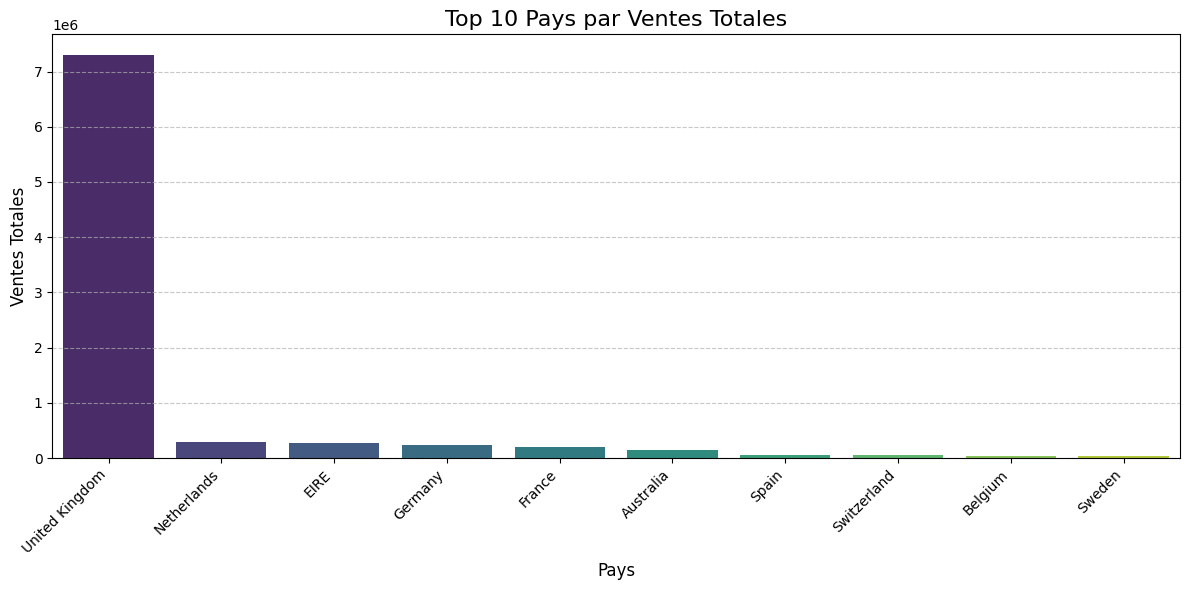

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette='viridis')
plt.title('Top 10 Pays par Ventes Totales', fontsize=16)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Ventes Totales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without `hue`. To address this, I will explicitly set `hue` to the x-axis variable and add `legend=False` as suggested by the warning, which will prevent future warnings and ensure better practice in `seaborn` plotting.



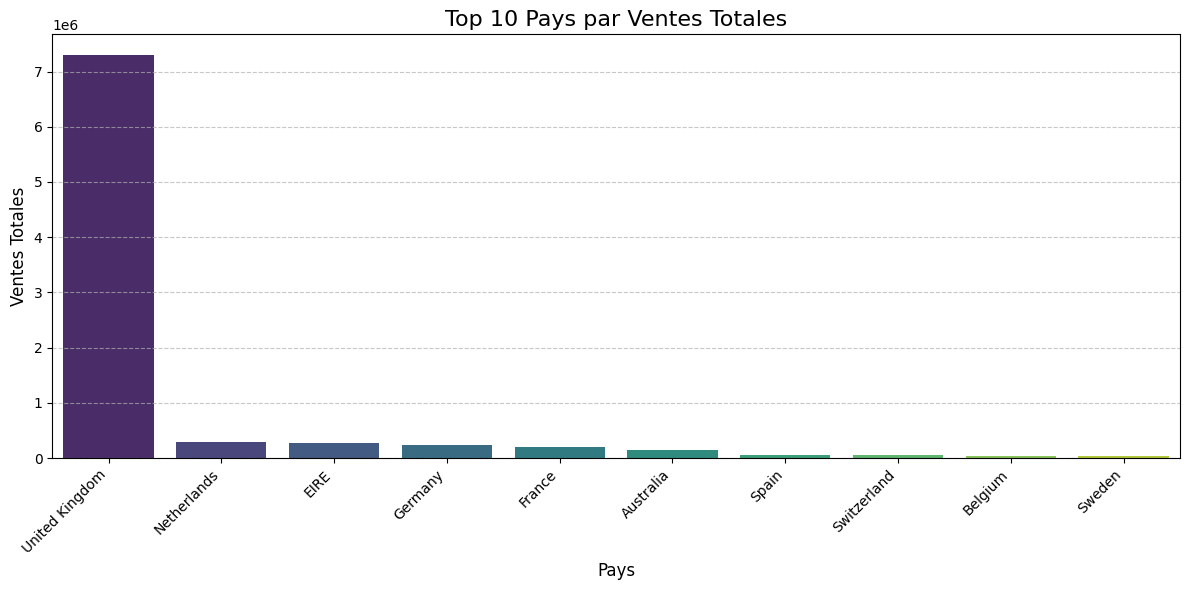

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values, hue=sales_by_country.index, palette='viridis', legend=False)
plt.title('Top 10 Pays par Ventes Totales', fontsize=16)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Ventes Totales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualisation des Résultats

### Subtask:
Générer des graphiques pour illustrer les tendances de vente (par exemple, ventes mensuelles), les top produits, les top clients et la distribution géographique des ventes. Assurez-vous que tous les graphiques incluent des légendes appropriées.


**Reasoning**:
The first plotting instruction is to create a line plot to visualize monthly sales. I will combine the 'Year' and 'Month' columns from the `monthly_sales` DataFrame to create a datetime object for the x-axis, and then plot 'MonthlySales' against this time index.



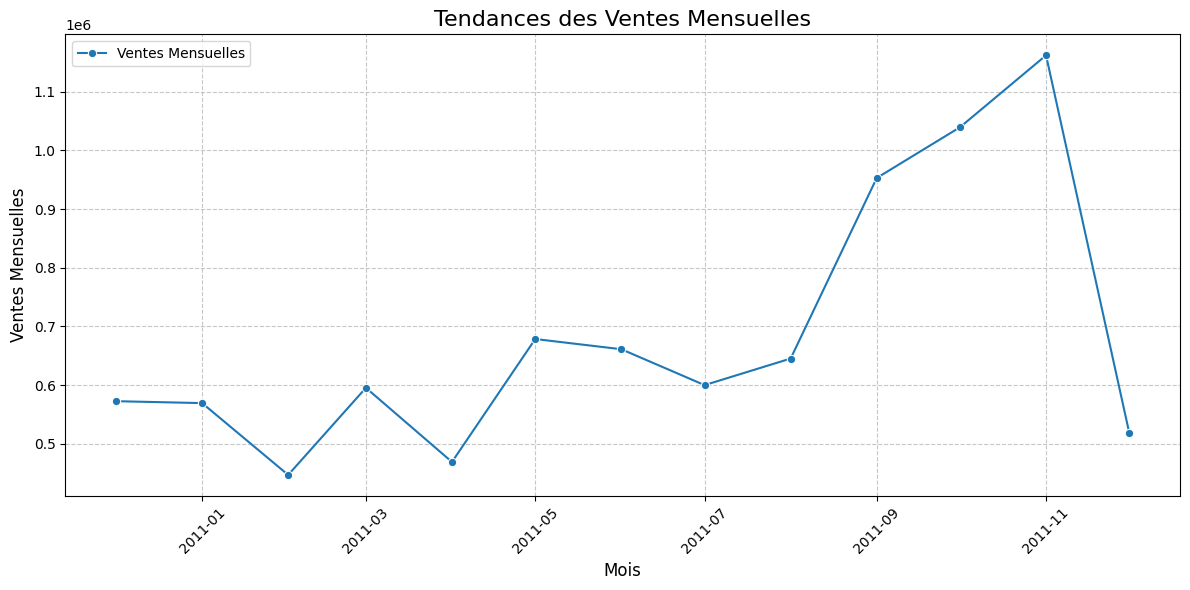

In [34]:
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str))
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='MonthlySales', data=monthly_sales, marker='o')
plt.title('Tendances des Ventes Mensuelles', fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Ventes Mensuelles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Ventes Mensuelles'])
plt.tight_layout()
plt.show()

**Reasoning**:
The next instruction is to create a bar plot for the 10 top-selling products by quantity, using the `top_selling_products_quantity` Series. I will use a bar plot to visualize this and ensure it has a title, axis labels, and a legend.



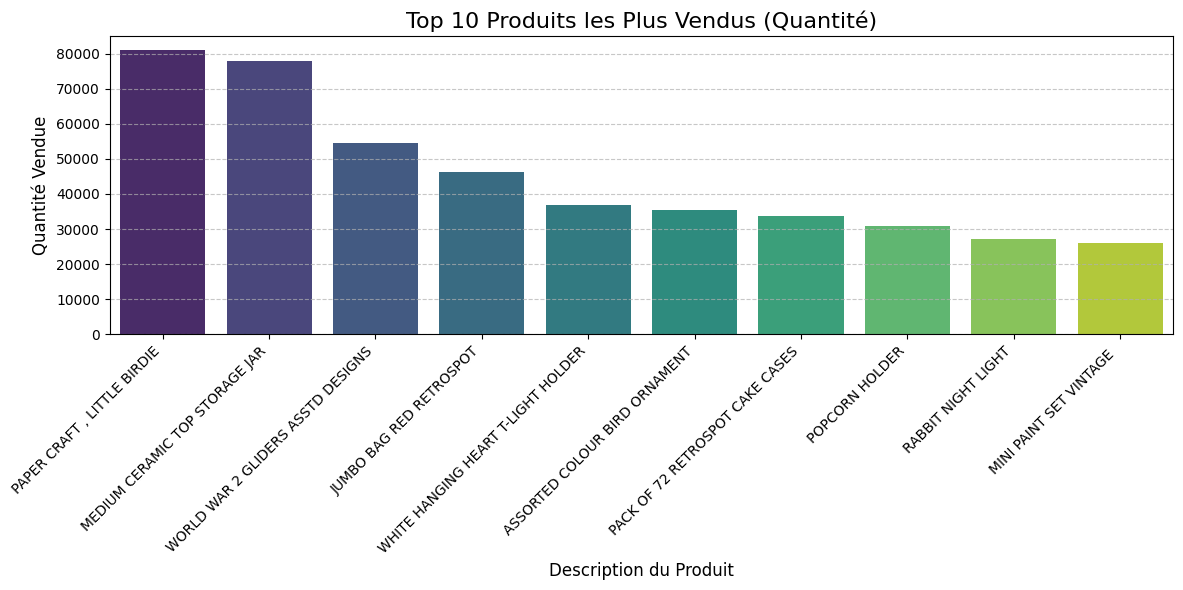

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_products_quantity.index, y=top_selling_products_quantity.values, hue=top_selling_products_quantity.index, palette='viridis', legend=False)
plt.title('Top 10 Produits les Plus Vendus (Quantité)', fontsize=16)
plt.xlabel('Description du Produit', fontsize=12)
plt.ylabel('Quantité Vendue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
Following the instructions, I will now create a bar plot to visualize the 10 most profitable products using the `top_profitable_products` Series, ensuring it includes a title, axis labels, and handles the `hue` parameter for better plotting practice.



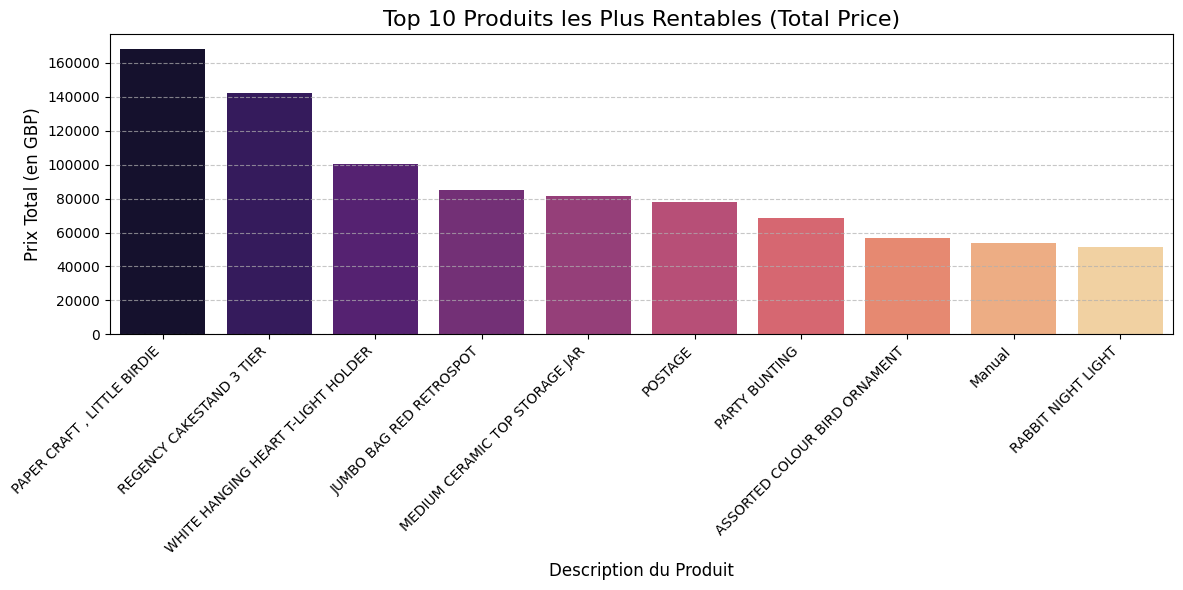

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_profitable_products.index, y=top_profitable_products.values, hue=top_profitable_products.index, palette='magma', legend=False)
plt.title('Top 10 Produits les Plus Rentables (Total Price)', fontsize=16)
plt.xlabel('Description du Produit', fontsize=12)
plt.ylabel('Prix Total (en GBP)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
Following the instructions, I will now create a bar plot to visualize the 10 most active customers using the `most_active_customers` Series, ensuring it includes a title, axis labels, and handles the `hue` parameter for better plotting practice.



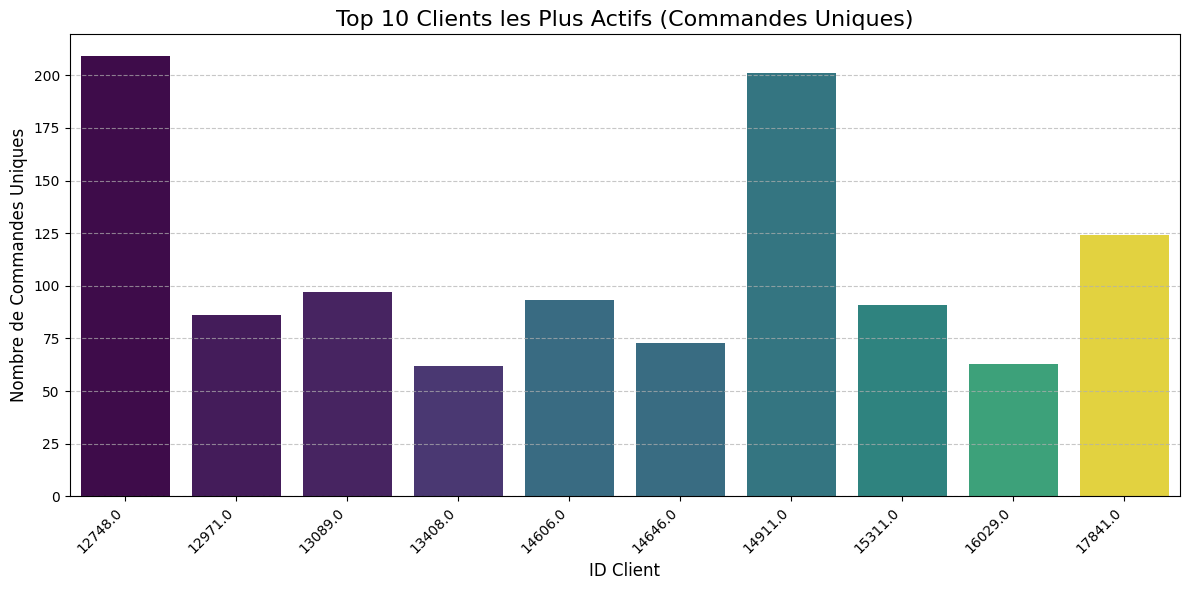

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_active_customers.index, y=most_active_customers.values, hue=most_active_customers.index, palette='viridis', legend=False)
plt.title('Top 10 Clients les Plus Actifs (Commandes Uniques)', fontsize=16)
plt.xlabel('ID Client', fontsize=12)
plt.ylabel('Nombre de Commandes Uniques', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
The next instruction is to create a bar plot for the 10 most profitable customers using the `most_profitable_customers` Series. I will ensure the plot has a title, axis labels, and correctly handles the `hue` parameter for visualization.



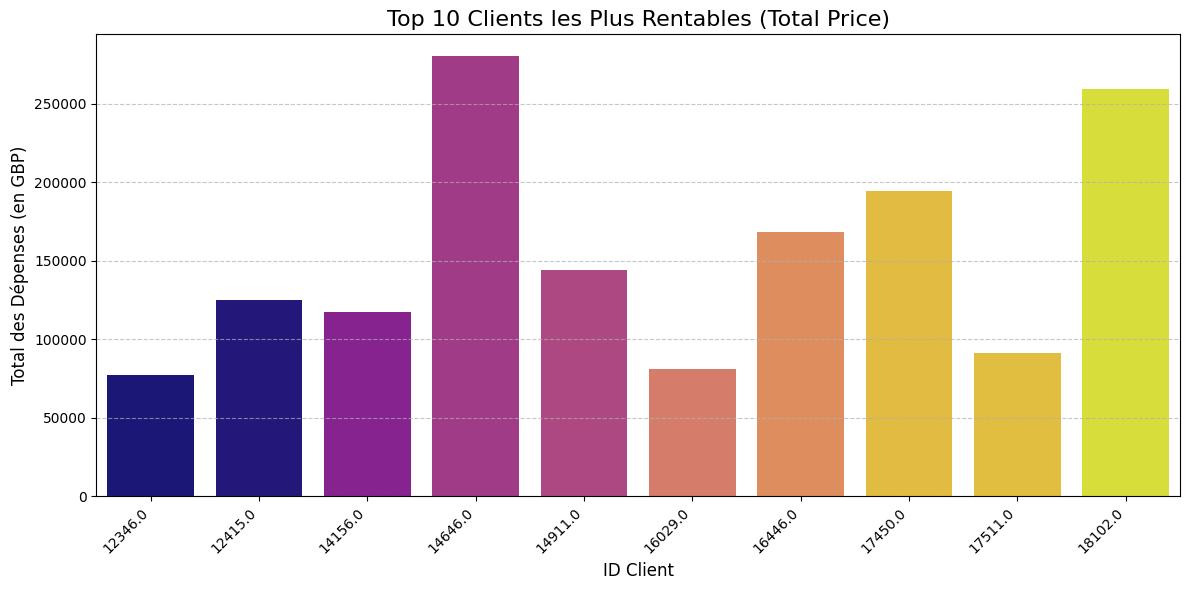

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_profitable_customers.index, y=most_profitable_customers.values, hue=most_profitable_customers.index, palette='plasma', legend=False)
plt.title('Top 10 Clients les Plus Rentables (Total Price)', fontsize=16)
plt.xlabel('ID Client', fontsize=12)
plt.ylabel('Total des Dépenses (en GBP)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Fournir un résumé complet des découvertes de l'analyse approfondie de la base de données 'Online Retail'.


## Summary:

### Data Analysis Key Findings

*   **Data Cleaning and Preparation**:
    *   1,454 rows were removed due to missing product descriptions.
    *   133,626 rows were removed due to missing customer IDs.
    *   8,905 rows with negative quantities were filtered out, as these likely represented returns or errors.
    *   40 rows with non-positive unit prices were removed.
    *   New features `TotalPrice`, `Year`, `Month`, `Day`, and `Hour` were successfully extracted and added to the dataset.
*   **Sales Trends**:
    *   The highest daily sales occurred on **December 9, 2011**, totaling **£184,349.28**.
    *   The highest monthly sales were recorded in **November 2011**, reaching **£1,161,817.38**.
*   **Top Products**:
    *   The top-selling product by quantity was `PAPER CRAFT, LITTLE BIRDIE` with 80,995 units sold, followed by `MEDIUM CERAMIC TOP STORAGE JAR` (77,916 units).
    *   The most profitable product by `TotalPrice` was also `PAPER CRAFT, LITTLE BIRDIE`, generating £168,469.60, with `REGENCY CAKESTAND 3 TIER` being the second most profitable at £142,592.95.
*   **Top Customers**:
    *   Customer ID `12748.0` was the most active with 209 unique orders, followed by `14911.0` with 201 unique orders.
    *   Customer ID `14646.0` was the most profitable, spending £280,206.02, while `18102.0` was the second most profitable with £259,657.30.
*   **Geographical Distribution of Sales**:
    *   The **United Kingdom** is overwhelmingly the dominant market, accounting for £7,308,391.55 in total sales, significantly surpassing the second-highest country, **Netherlands**, which had £285,446.34 in sales.
    *   The top 5 countries by sales are United Kingdom, Netherlands, EIRE, Germany, and France.

### Insights or Next Steps

*   **Focus on High-Value Segments**: Given the clear dominance of the UK market and specific top products and customers, the business should tailor marketing strategies and product development to these high-performing segments to maximize returns.
*   **Analyze Seasonal Peaks**: The identification of November and December 9th, 2011, as peak sales periods suggests strong holiday season activity. Further analysis into product performance and customer behavior during these peak times could inform inventory management and promotional campaigns for future years.
